# California Housing Price Prediction .

DESCRIPTION

Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing

Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

1. Load the data :

    Read the “housing.csv” file from the folder into the program.
    Print first few rows of this data.
    Extract input (X) and output (Y) data from the dataset.

2. Handle missing values :

    Fill the missing values with the mean of the respective column.

3. Encode categorical data :

    Convert categorical column in the dataset to numerical data.

4. Split the dataset : 

    Split the data into 80% training dataset and 20% test dataset.

5. Standardize data :

    Standardize training and test datasets.

6. Perform Linear Regression : 

    Perform Linear Regression on training data.
    Predict output for test dataset using the fitted model.
    Print root mean squared error (RMSE) from Linear Regression.

            [ HINT: Import mean_squared_error from sklearn.metrics ]

7. Bonus exercise: Perform Linear Regression with one independent variable :

    Extract just the median_income column from the independent variables (from X_train and X_test).
    Perform Linear Regression to predict housing values based on median_income.
    Predict output for test dataset using the fitted model.
    Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

Dataset Description :
Field 	Description
longitude 	(signed numeric - float) : Longitude value for the block in California, USA
latitude 	(numeric - float ) : Latitude value for the block in California, USA
housing_median_age 	(numeric - int ) : Median age of the house in the block
total_rooms 	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
total_bedrooms 	(numeric - float ) : Count of the total number of bedrooms in all houses in the block
population 	(numeric - int ) : Count of the total number of population in the block
households 	(numeric - int ) : Count of the total number of households in the block
median_income 	(numeric - float ) : Median of the total household income of all the houses in the block
ocean_proximity 	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
median_house_value 	(numeric - int ) : Median of the household prices of all the houses in the block

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.max_columns', None)

In [2]:
df_house=pd.read_excel(r'../dataset/housing.xlsx')
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [4]:
df_median_income=df_house[['median_income']]
df_target=df_house['median_house_value']


In [5]:
# Function to calculate missing values by column# Funct 
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [6]:
# Missing values statistics
missing_values = missing_values_table(df_house)
missing_values.head(20)

Your selected dataframe has 10 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
total_bedrooms,207,1.0


In [7]:
df_house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
tb_mean=df_house['total_bedrooms'].mean()
df_house['total_bedrooms'].fillna(tb_mean,inplace=True)
df_house.isnull().sum(0)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [11]:
ct=df_house['ocean_proximity'].value_counts()
ct

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

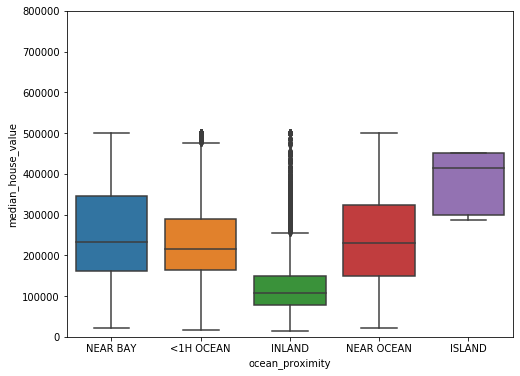

In [12]:
#box plot overallqual/saleprice
var = 'ocean_proximity'
data = pd.concat([df_house['median_house_value'], df_house[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="median_house_value", data=data)
fig.axis(ymin=0, ymax=800000);

In [4]:
ocean_prox=pd.get_dummies(df_house['ocean_proximity'])
ocean_prox

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [5]:
df_housn=df_house.drop('ocean_proximity',axis=1)

df_housn

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


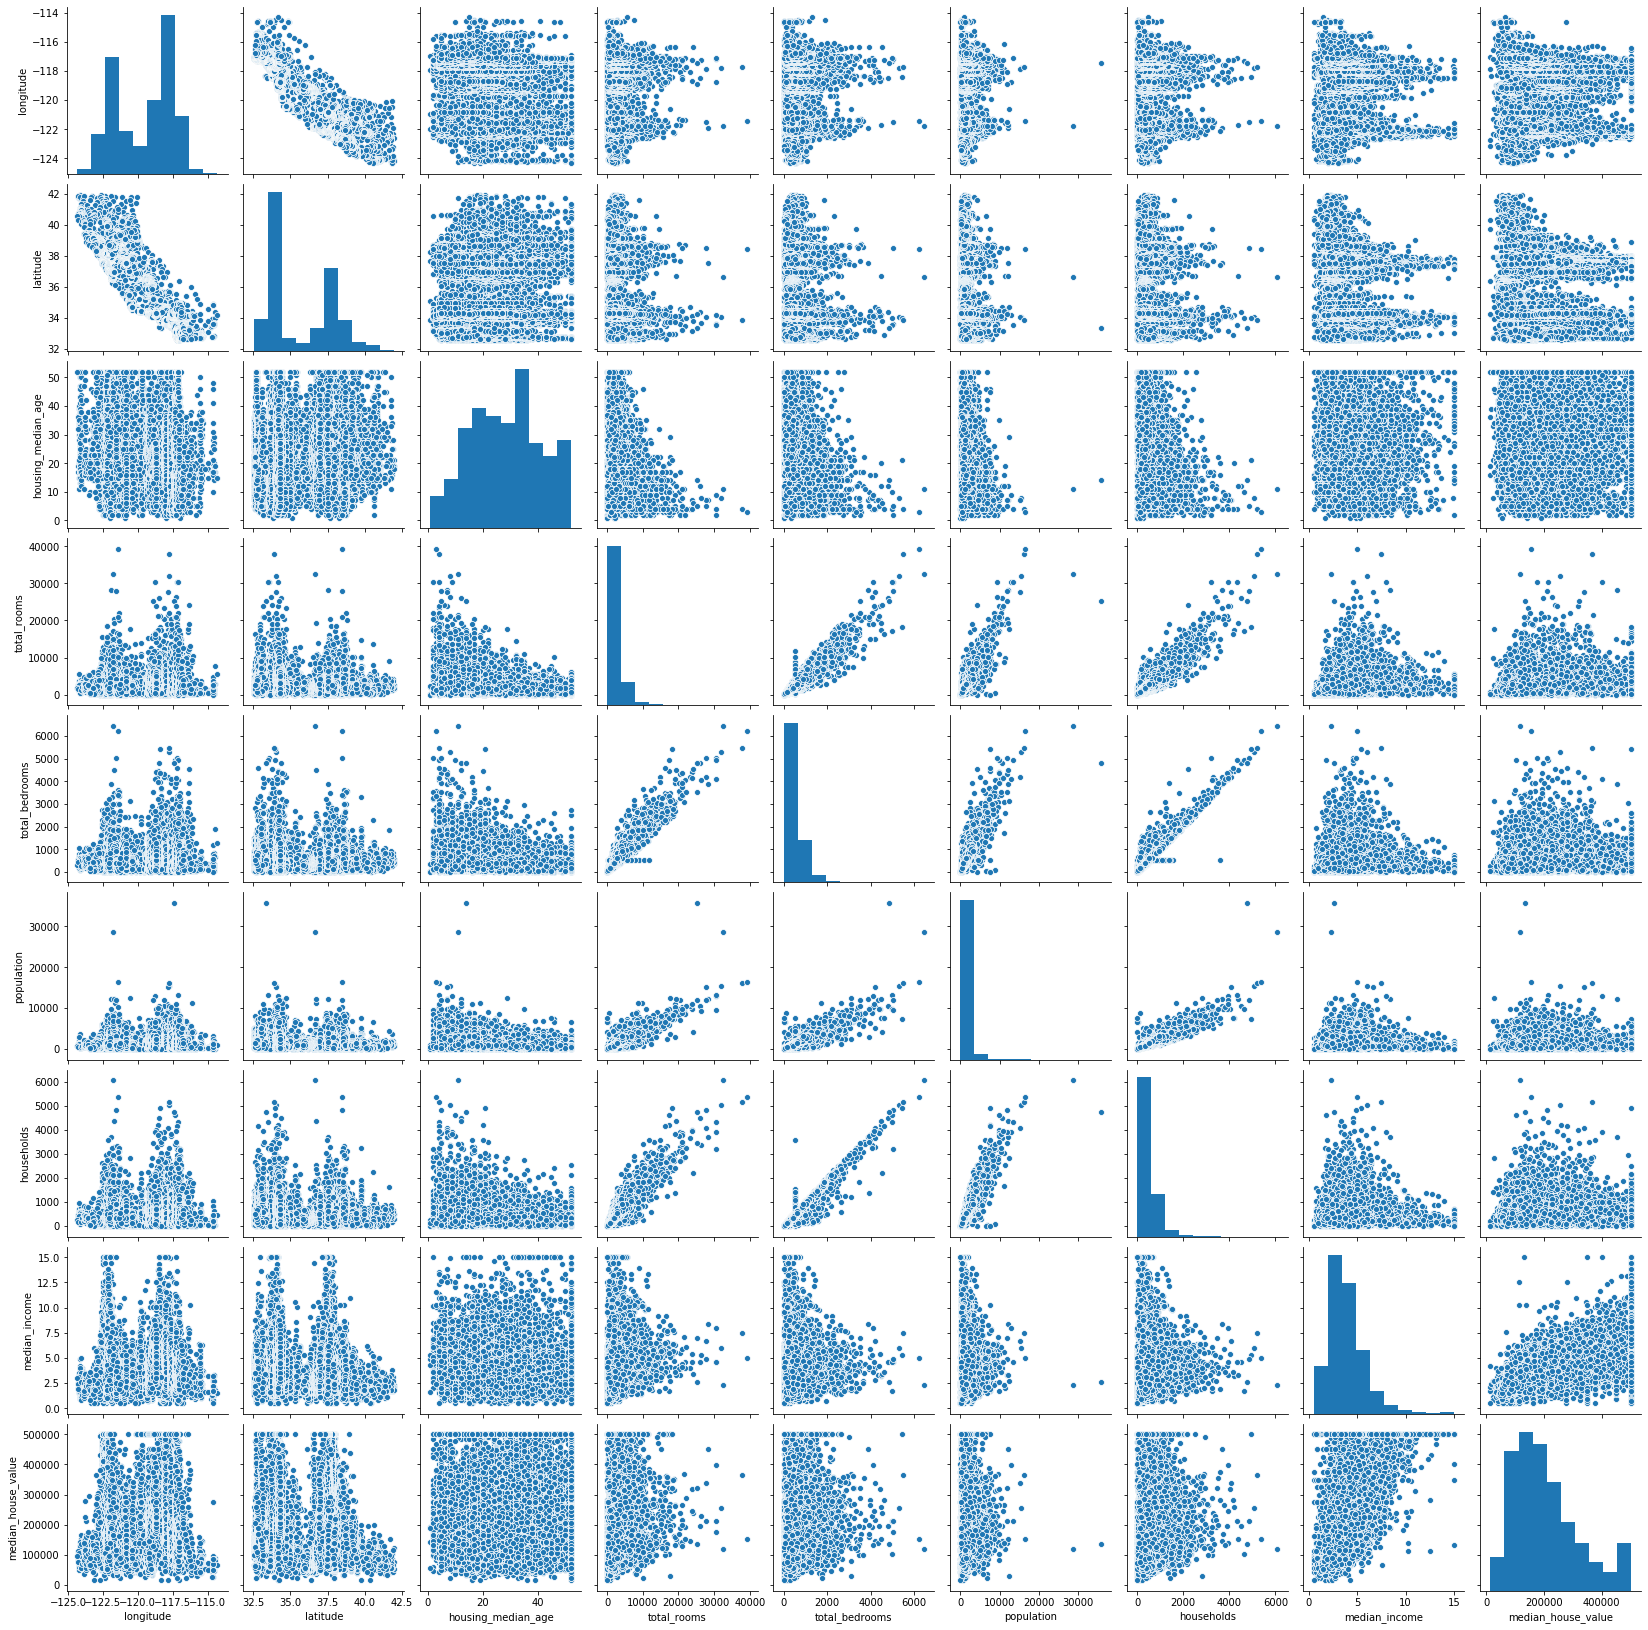

In [15]:
sns.pairplot(df_housn)

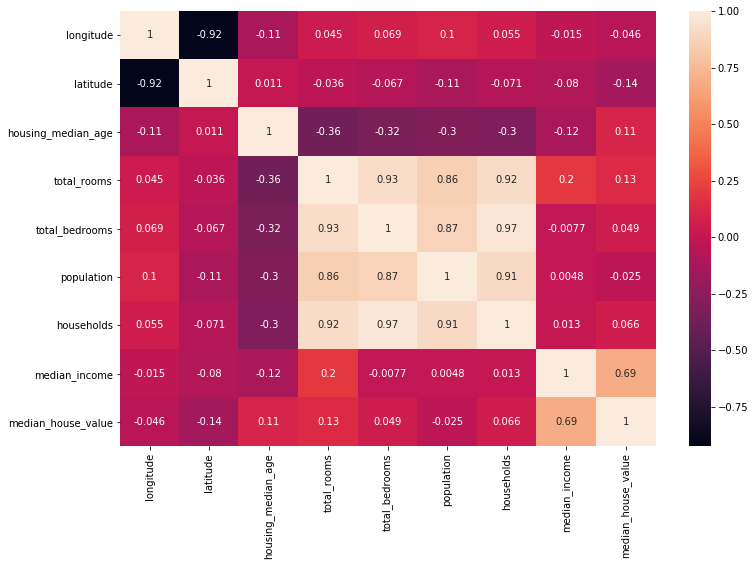

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df_housn.corr(),annot=True)

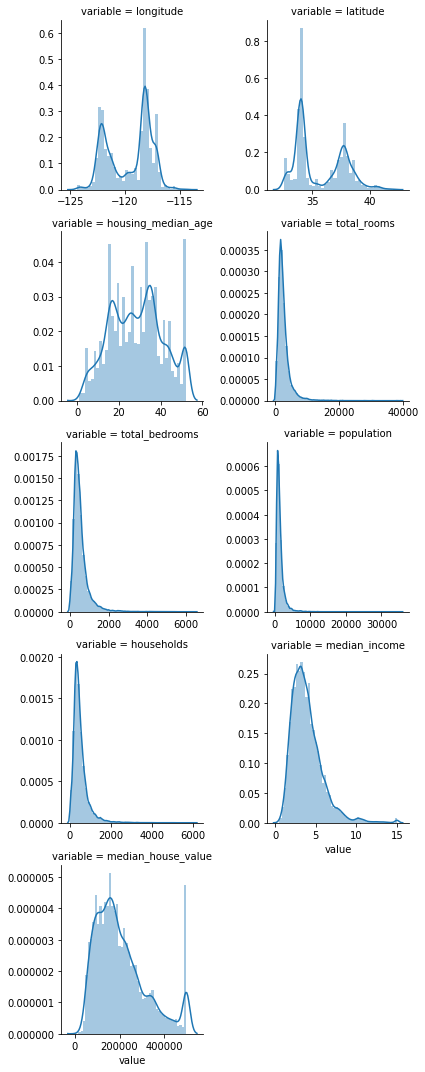

In [16]:
f = pd.melt(df_house, value_vars=df_housn)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")


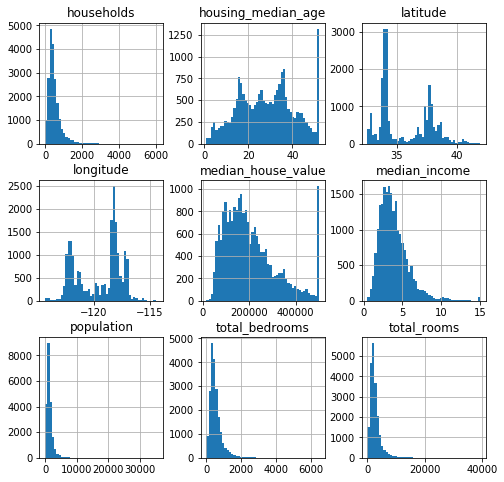

In [8]:
# plots between the variables to show the relationship

df_housn.hist(figsize=(8,8),bins=50);

In [17]:
Y=df_housn.pop('median_house_value')
Y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [18]:
X=pd.concat([df_housn,ocean_prox], axis =1)
#print(X.head())
X.shape

(20640, 13)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 0)

In [20]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14740,-117.05,32.58,22,2101,399.0,1551,371,4.1518,0,0,0,0,1
10101,-117.97,33.92,32,2620,398.0,1296,429,5.7796,1,0,0,0,0
20566,-121.84,38.65,29,3167,548.0,1554,534,4.3487,0,1,0,0,0
2670,-115.60,33.20,37,709,187.0,390,142,2.4511,0,1,0,0,0
15709,-122.43,37.79,25,1637,394.0,649,379,5.0049,0,0,0,1,0


In [21]:
scaler=StandardScaler()

In [22]:

X_train=scaler.fit_transform(X_train)


In [23]:
X_test = scaler.transform(X_test)#this uses X_train mean and std dev

In [24]:
print(X.shape)
print(len(Y_test))

(20640, 13)
4128


In [25]:
linReg=LinearRegression(fit_intercept=True, normalize=True,copy_X=False,n_jobs=None)
linReg.fit(X_train,Y_train)
pred=linReg.predict(X_test)

In [26]:
pred


array([216580.43445119, 287452.10783574, 179457.58064554, ...,
        89138.6396655 , 255304.51129843, 213286.39732918])

In [27]:
Y_test.head()

14740    136900
10101    241300
20566    200700
2670      72500
15709    460000
Name: median_house_value, dtype: int64

In [28]:
import math
MSE = mean_squared_error(Y_test, pred)
 
RMSE = math.sqrt(MSE)
RMSE

68689.2056170515

In [29]:
score=r2_score(Y_test, pred)
print(score*100,'%')

63.81617983930402 %


In [30]:
linReg.score(X_test,Y_test)

0.6381617983930402

In [31]:
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [32]:
df_median_income.head()

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


In [33]:
df_target.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [34]:
w=df_median_income
z=df_target

In [35]:
z.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [36]:
w_train, w_test, z_train, z_test = train_test_split(w, z, test_size =0.2, random_state = 0)

In [37]:
type(w_test)

pandas.core.frame.DataFrame

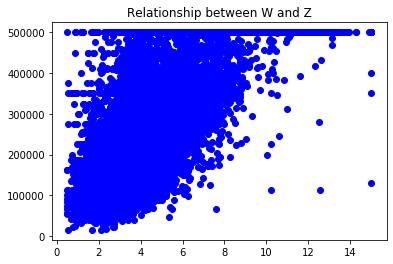

In [38]:
plt.title('Relationship between W and Z')
plt.scatter(w_train, z_train,  color='blue')
plt.show()


In [39]:
lr=LinearRegression(fit_intercept=True, normalize=False,copy_X=False,n_jobs=None)
lr.fit(w_train,z_train)
predi=lr.predict(w_test)

In [40]:
predi

array([218829.83059812, 287249.80945645, 227105.96638704, ...,
       178937.09074405, 302549.52213887, 184397.07062714])

In [45]:
MSErr = mean_squared_error(z_test, predi)
 
RMSErr = math.sqrt(MSErr)
RMSErr

84941.05152406936

In [47]:
score=r2_score(z_test, predi)
print(score*100,'%')

44.66846804895944 %
